In [1]:
"""
This script creates the figure of mean 
annual mass balance vs. altitude 

"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
from my_fun.nan_helper import nan_helper


In [4]:
filename_nc  = 'in/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'MB_elv'

ds = xr.open_dataset(filename_nc)
time_nc = ds['time'].values
mask_nc = ds['MASK'].values
lat_nc  = ds['lat'].values        
lon_nc  = ds['lon'].values
dem_nc   = ds['HGT'].values


In [5]:
lat_n,lon_n = np.shape(mask_nc)        
point_g = np.sum(mask_nc[mask_nc==1])
elev_g  = np.zeros((int(point_g),1))

z = 0
for i in range(lat_n):
    for j in range(lon_n):
            if mask_nc[i,j] == 1:
                var1 = dem_nc[i,j]
                elev_g[z,0] = var1
                z = z+1

elev_g_20 = np.arange(np.min(elev_g),np.max(elev_g),10) 

ME_all   = np.sum(ds['MB'].values,axis=0)

var1 = np.zeros((len(elev_g),1))

z = 0
for i in range(lat_n):
    for j in range(lon_n):
            if mask_nc[i,j] == 1:
                var01 = ME_all[i,j]
                var1[z,0] = var01
                z = z+1


var2 = np.concatenate((elev_g, var1), axis=1)

var3 = var2[np.lexsort(([var2[:, i] for i in range(var2.shape[1]-1, -1, -1)]))]

a1 = 0
a2 = 1
MB_mean_40 = np.zeros((len(elev_g_20)))
MB_mean_40[:] = np.nan
MB_st_40 = np.zeros((len(elev_g_20)))
MB_st_40[:] = np.nan

for i in range(len(elev_g_20)-1):
    var_in = np.zeros((len(var3)))
    var_in[:] = np.nan  
    for j in range(len(var3)):
        if int(var3[j,0]) in range(int(elev_g_20[a1]),int(elev_g_20[a2])):
            var_in[j] = var3[j,1]
    MB_mean_40[i] = np.nanmean(var_in)
    MB_st_40[i] = np.nanstd(var_in)
    a1 = a1+1
    a2 = a2+1        

for j in range(len(var3)):
    if var3[j,0] >= elev_g_20[a1]:
        var_in[j] = var3[j,1]

MB_mean_40[-1] = np.nanmean(var_in)
MB_st_40[-1] = np.nanstd(var_in)

nans, x = nan_helper(MB_mean_40)
MB_mean_40[nans]= np.interp(x(nans), x(~nans), MB_mean_40[~nans])
nans, x = nan_helper(MB_st_40)
MB_st_40[nans]= np.interp(x(nans), x(~nans), MB_st_40[~nans])

y = var3[:,0]
x = var3[:,1]


<ipython-input-5-379b51a07fd9>:45: RuntimeWarning: Mean of empty slice
  MB_mean_40[i] = np.nanmean(var_in)
/home/christian/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


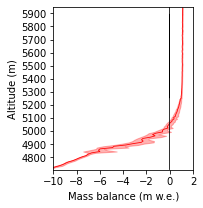

In [7]:
fig, (ax0) = plt.subplots(1,1,figsize=(2.5,3.0)) 
ax0.plot(MB_mean_40,elev_g_20,'-r', lw=0.8)
ax0.fill_betweenx(elev_g_20,MB_mean_40-MB_st_40,MB_mean_40+MB_st_40, color='r', alpha=0.3)
ax0.set_yticks(np.arange(4800, 6600, 100.0))
ax0.set_ylim(np.min(elev_g), np.max(elev_g))
ax0.set_xticks(np.arange(-20, 10, 2.0))
ax0.set_xlim(-10, 2)
ax0.plot(np.zeros(len(elev_g)),elev_g,'-k', lw=0.4)

plt.ylabel('Altitude ($m$)')
plt.xlabel('Mass balance (m w.e.)')
plt.ylabel('Altitude (m)')
font_f = 10
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig(dir_graphics+'/'+name_fig+'.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)